In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('happiness_score_dataset.csv')
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
# We should predict the happiness score based on the above attributes denoting some factors which measures the happiness 

In [4]:
# converting thedata into a dataframe
df = pd.DataFrame(ds)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df # just swapped the index position of the coulumns dystopia residual and happiness

# It will be helpful while splitting the data later for our model

In [8]:
df = swap_columns(df,'Happiness Score','Dystopia Residual')
df.head()

,Country,Region,Happiness Rank,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,Switzerland,Western Europe,1,2.51738,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,Iceland,Western Europe,2,2.70201,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,Denmark,Western Europe,3,2.49204,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,Norway,Western Europe,4,2.46531,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,Canada,North America,5,2.45176,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


### Checking the null values

In [9]:
df.isnull().sum() # Since there are no null values we can continue 

Country                          0
Region                           0
Happiness Rank                   0
Dystopia Residual                0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Happiness Score                  0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.dtypes # checking the datasets

# we can see the datatypes all are encoded, we need not change any datatypes

Country                           object
Region                            object
Happiness Rank                     int64
Dystopia Residual                float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Happiness Score                  float64
dtype: object

In [12]:
# checking the unique value regions
df['Region'].nunique() # we can see this are 10 different regions around the world 

10

In [13]:
df['Region'].value_counts() # most of these countries are part of the Sub-saharan Africa region

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [14]:
df.drop_duplicates() # there are no duplicates

,Country,Region,Happiness Rank,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,Switzerland,Western Europe,1,2.51738,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,Iceland,Western Europe,2,2.70201,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,Denmark,Western Europe,3,2.49204,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,Norway,Western Europe,4,2.46531,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,Canada,North America,5,2.45176,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.67042,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,3.465
154,Benin,Sub-Saharan Africa,155,1.63328,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,3.340
155,Syria,Middle East and Northern Africa,156,0.32858,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,3.006
156,Burundi,Sub-Saharan Africa,157,1.83302,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2.905


In [15]:
df.shape

(158, 12)

from the above dataset Happiness rank is not required

In [16]:
print('Happiness Rank - {}'.format(len(df['Happiness Rank'])))
# we can see it is useless as it has all unique values

Happiness Rank - 158


In [17]:
# removing happiness rank
df.drop('Happiness Rank',axis=1,inplace=True)

### Checking the distribution of the  variables

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

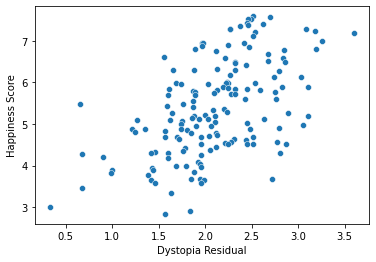

In [18]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

Text(0, 0.5, 'Economy(GDP per Capita)')

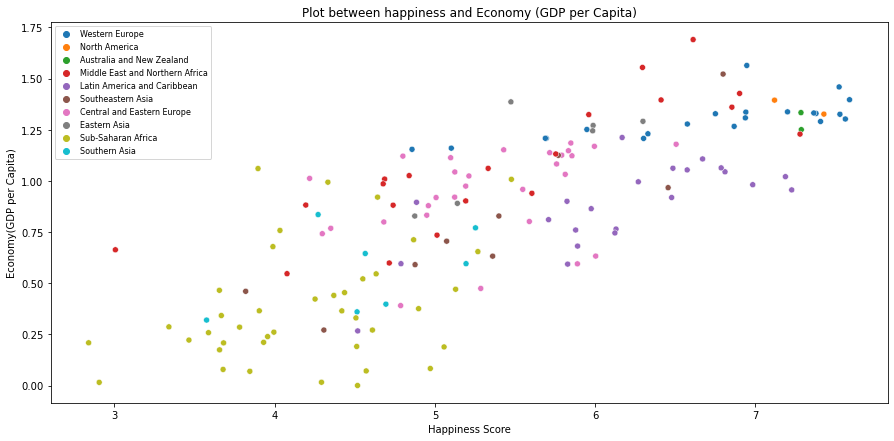

In [19]:
#plot between happiness and gdp
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between happiness and Economy (GDP per Capita)')
sns.scatterplot(x = df['Happiness Score'],y = df['Economy (GDP per Capita)'],hue = df['Region'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')

In [20]:
# We can say that there is a positive correlation exists between the economy and happiness score, As one increases another increases

# The gdp percapta is high in western europe and north american countries along with their happiness score

# Sub-saharian africa countries have low gdp and happiness score comparing with the rest of the countries

Text(0, 0.5, 'Trust(Government Corruption)')

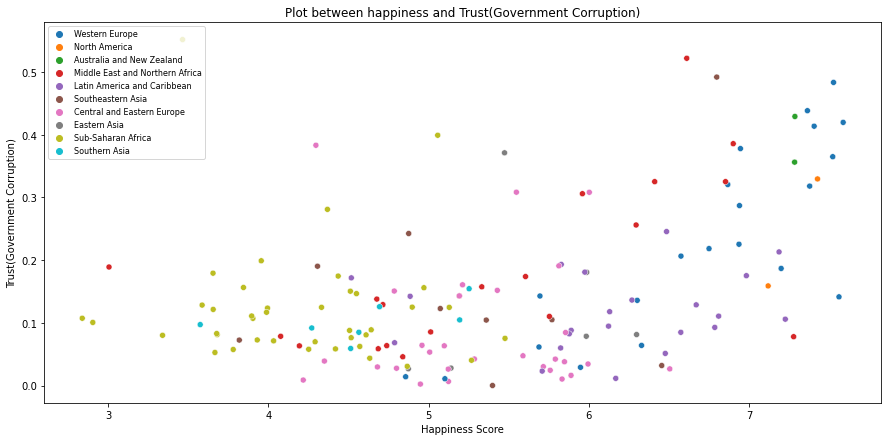

In [21]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between happiness and Trust(Government Corruption)')
sns.scatterplot(x = df['Happiness Score'],y = df['Trust (Government Corruption)'],hue = df['Region'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Happiness Score')
plt.ylabel('Trust(Government Corruption)')

# We can see there is lot of corruption in sub-sahran africa countries, which makes sense because there gdp is quite low and so os there happiness

Text(0, 0.5, 'Health (Life Expectancy)')

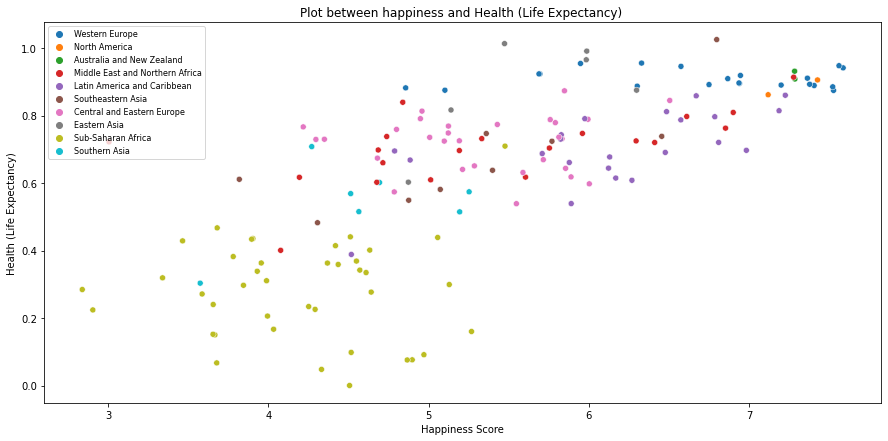

In [22]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between happiness and Health (Life Expectancy) ')
sns.scatterplot(x = df['Happiness Score'],y = df['Health (Life Expectancy)'],hue = df['Region'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')

# here also the life expectancy of Sub-Saharan Africa ciuntries are way less than other countries

# And there is a positive correlation exista between these two columns

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

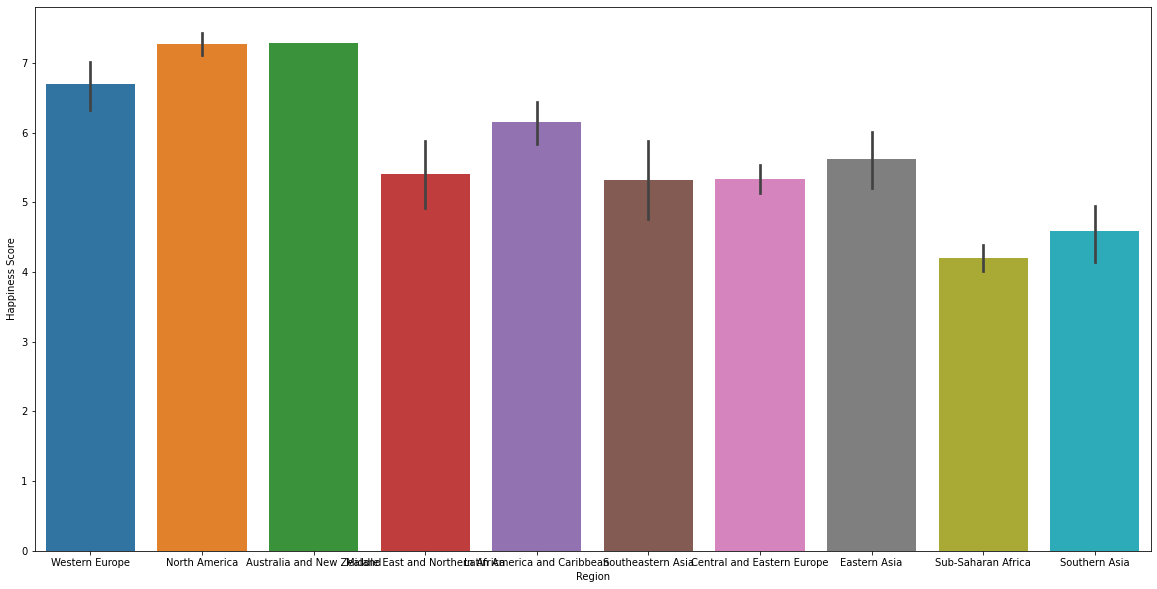

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='Region',y='Happiness Score',data=df)

# North American and australia nand newzeland countries are much happier compared to other countries

In [24]:
# Total Countries
total_countries = df.groupby('Region')[['Country']].count()
print(total_countries)

# there are 40 countries in the Sub-saharan Africa region

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<Figure size 720x360 with 0 Axes>

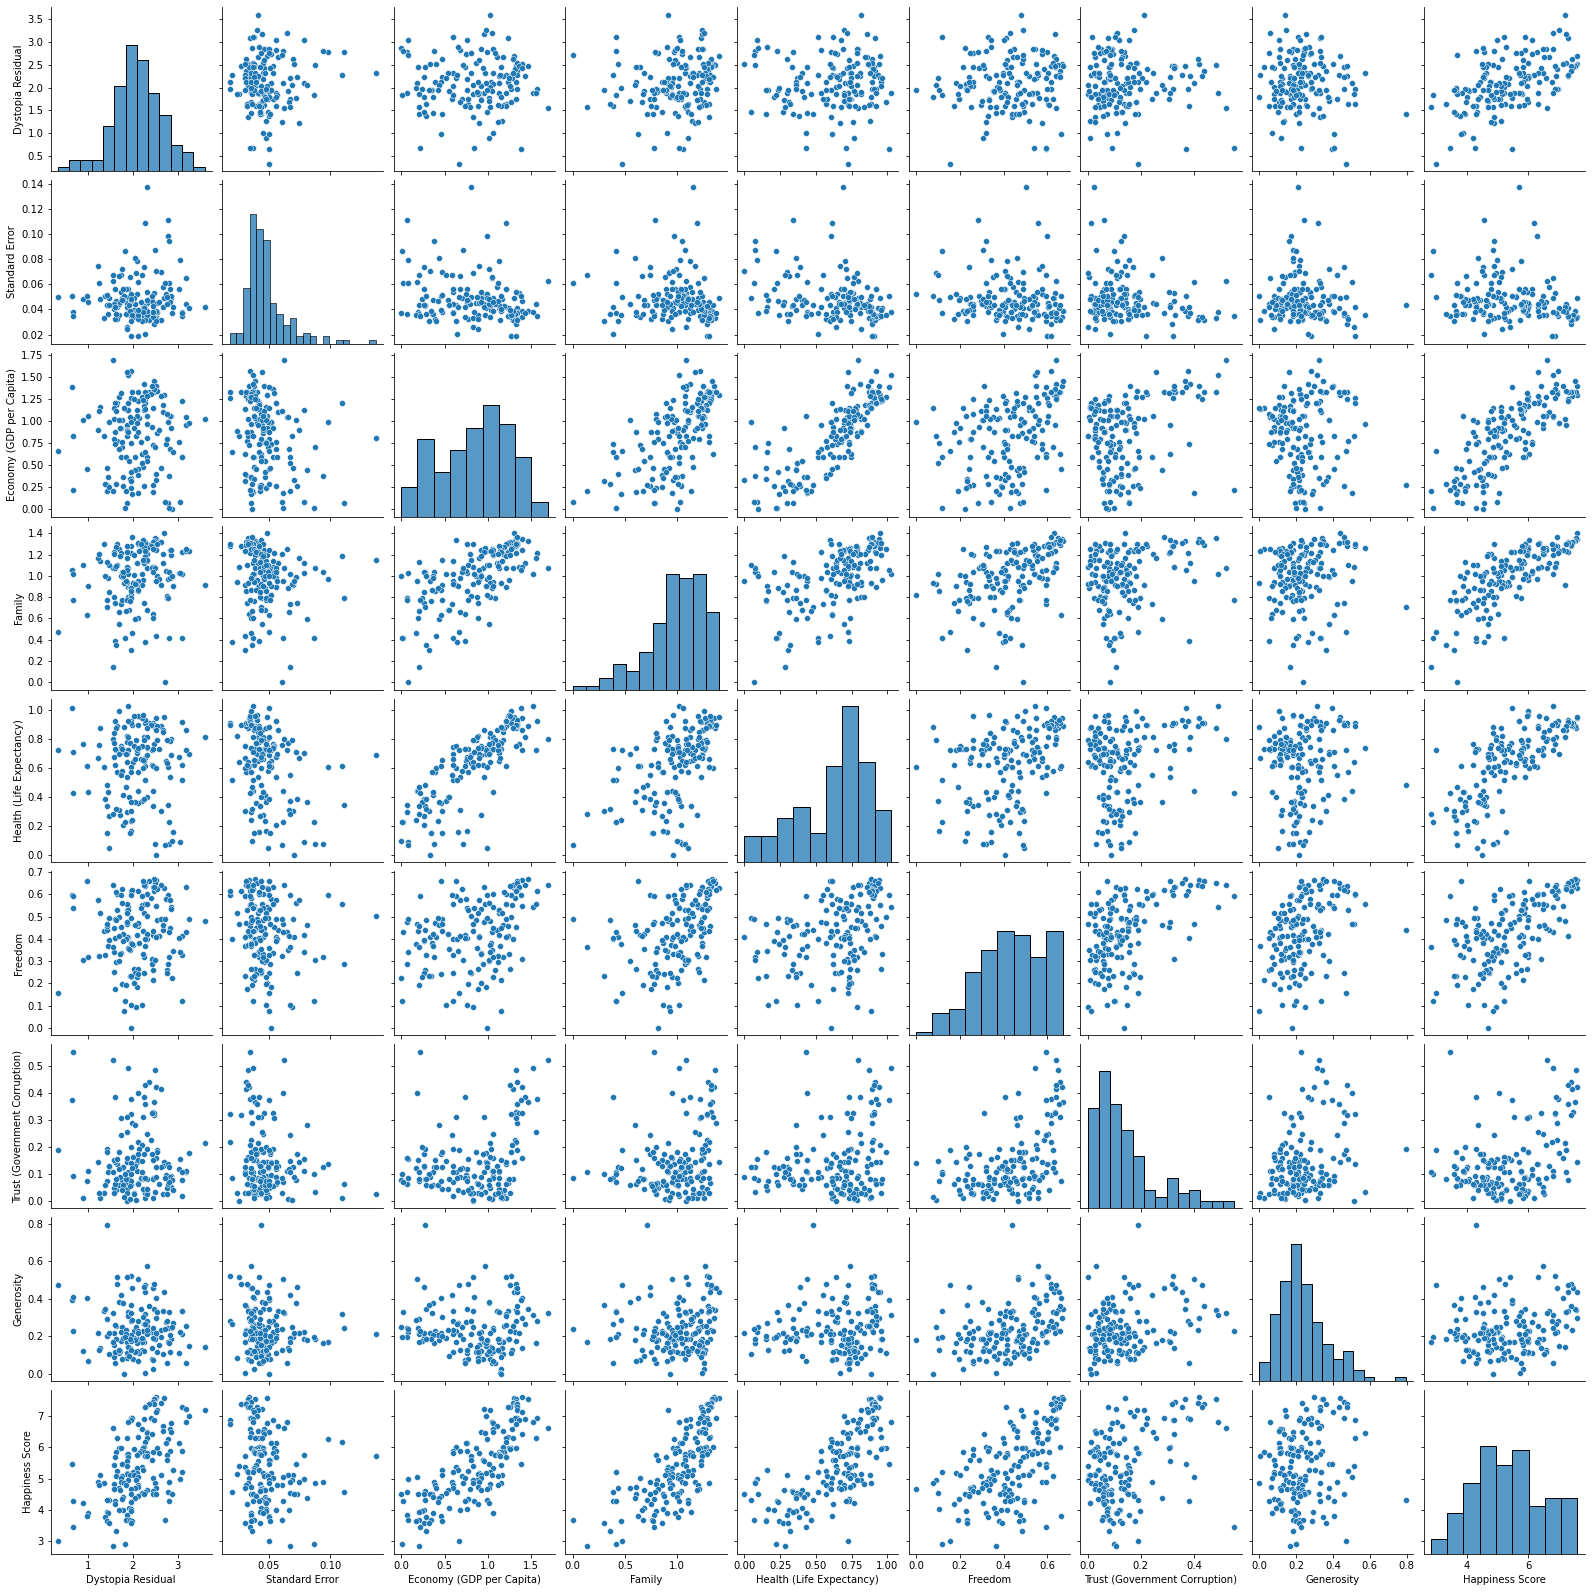

In [25]:
plt.figure(figsize = (10,5))
sns.pairplot(df)

In [26]:
# Encoding the region column
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [28]:
df.head()

,Country,Region,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,Switzerland,9,2.51738,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,Iceland,9,2.70201,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,Denmark,9,2.49204,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,Norway,9,2.46531,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,Canada,5,2.45176,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


### Coorelation 

In [29]:
df.corr()

,Region,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
Region,1.000000,-0.057276,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.176791
Dystopia Residual,-0.057276,1.000000,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,0.530474
Standard Error,-0.022600,0.083981,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,-0.177254
Economy (GDP per Capita),-0.260139,0.040059,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.780966
Family,-0.168533,0.148117,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.740605
Health (Life Expectancy),-0.357508,0.018979,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.724200
Freedom,0.092567,0.062783,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.568211
Trust (Government Corruption),0.165040,-0.033105,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,0.395199
Generosity,0.273557,-0.101301,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,0.180319
Happiness Score,-0.176791,0.530474,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,1.000000


<AxesSubplot:>

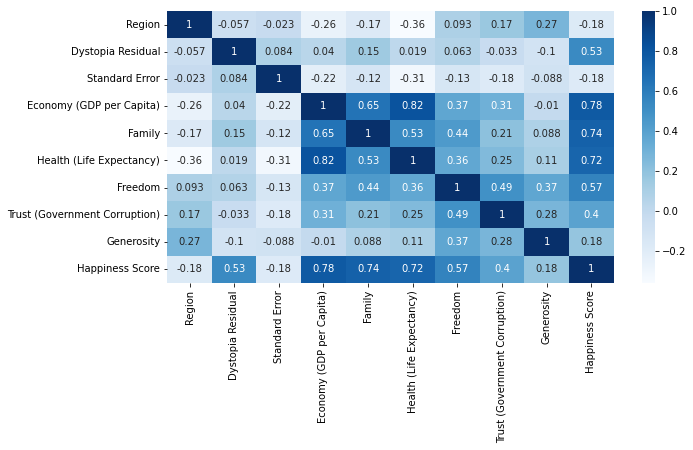

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [31]:
df.corr()['Happiness Score'].sort_values(ascending = False)

# we can see that region and Standard error are least correlated to the 
# Economy is highly correlated with the happiness score along with the family health and freedom
# While happiness rank is highly negatively correlated 

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Region                          -0.176791
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

### Descriptive Statistics

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Region,158.0,5.120253,2.993321,0.00000,3.000000,4.500000,8.000000,9.00000
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700


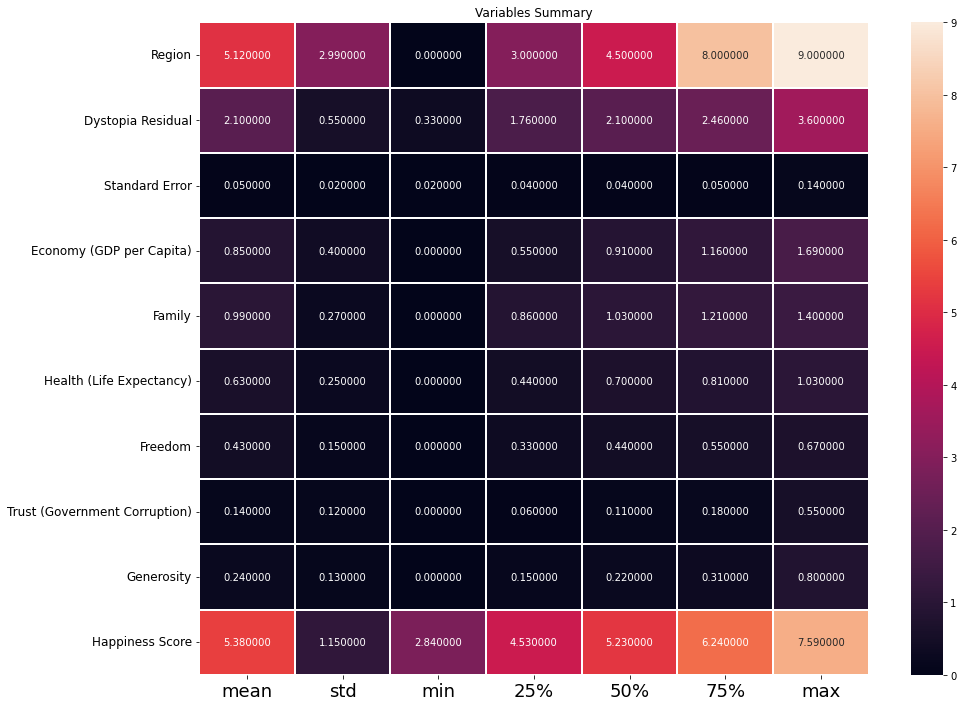

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18) # column names
plt.yticks(fontsize=12) # mean,std...
plt.title('Variables Summary')
plt.savefig('heatmap.png')
plt.show()

### Checking skewness

In [34]:
import warnings
warnings.filterwarnings('ignore')
df.skew()

Region                          -0.116119
Dystopia Residual               -0.238911
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Happiness Score                  0.097769
dtype: float64

In [35]:
df.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Region                          -0.116119
Happiness Score                  0.097769
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

In [36]:
# Based on the above correlation values, we can say generosity,trust, Standard Error and family has high skewness

### Checking the Distribution of the mentioned columns

<AxesSubplot:xlabel='Family', ylabel='Density'>

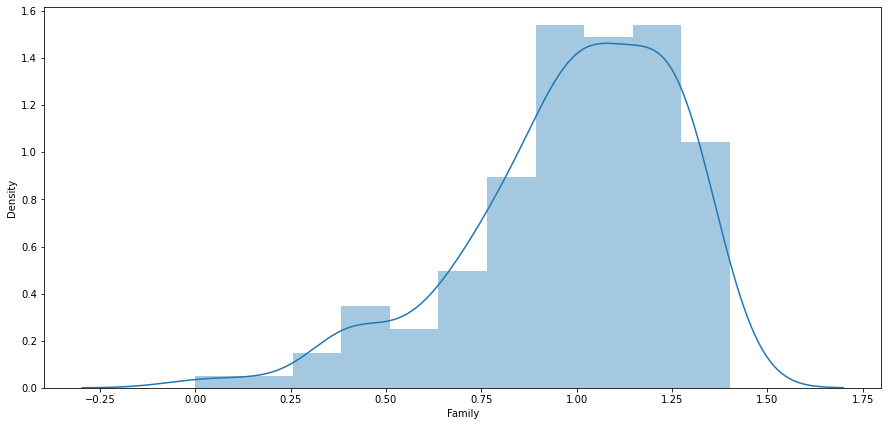

In [37]:
sns.distplot(df['Family']) # we can see this is negatively

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

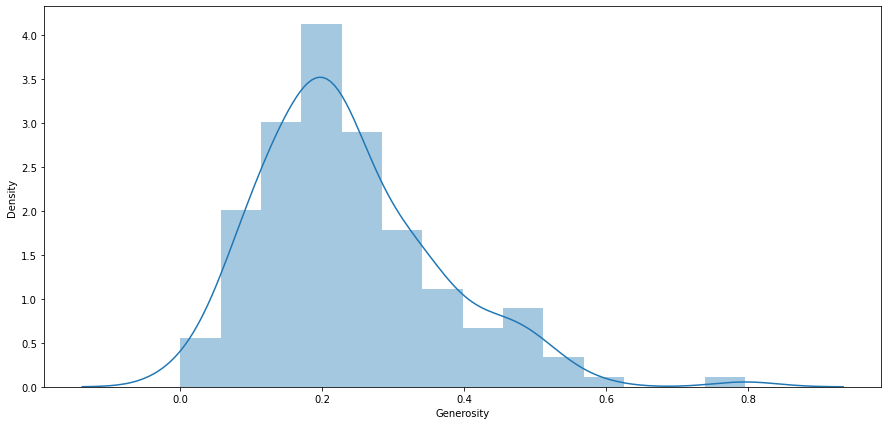

In [38]:
sns.distplot(df['Generosity']) # positively skewed and not nomalised the as the building blocks are out of normalise curve


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

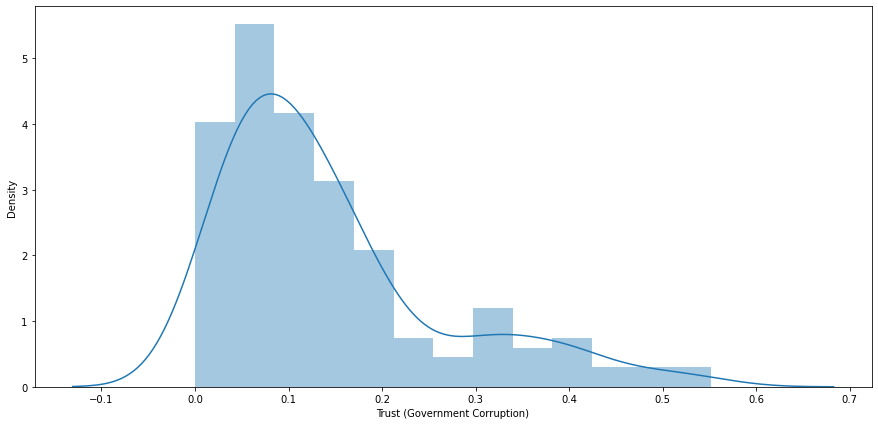

In [39]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

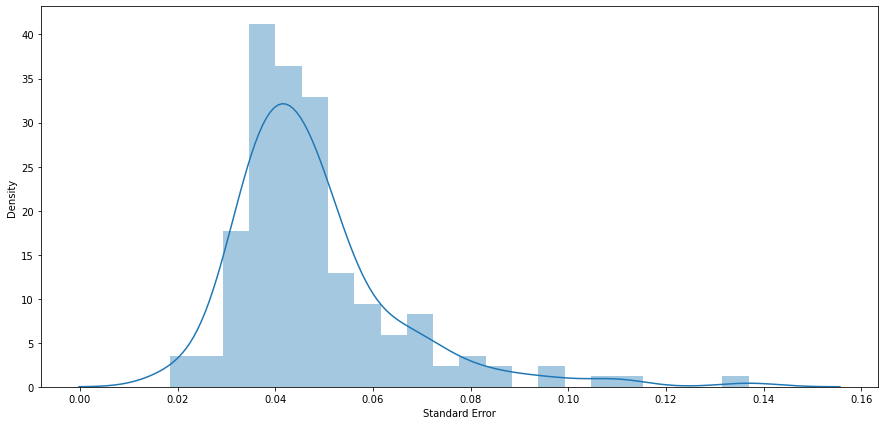

In [40]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

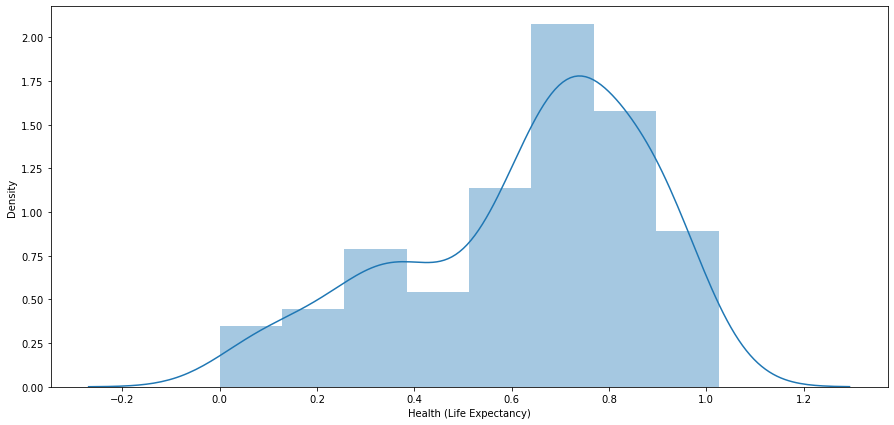

In [41]:
sns.distplot(df['Health (Life Expectancy)'])

### Checking Outliers

<AxesSubplot:>

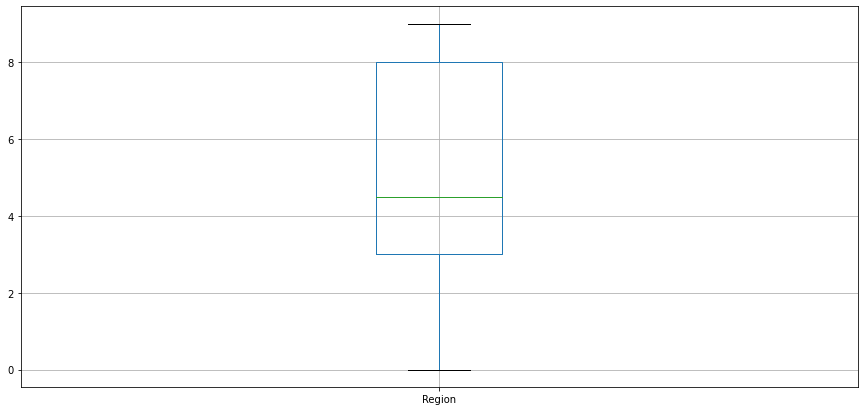

In [42]:
df.boxplot('Region')

<AxesSubplot:>

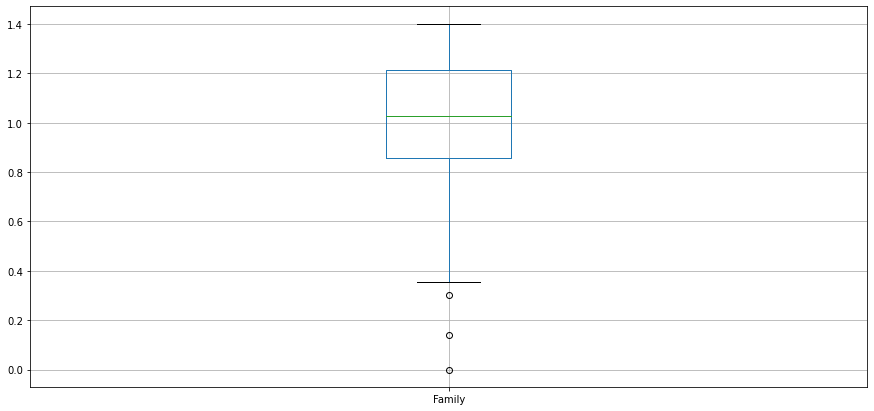

In [43]:
df.boxplot('Family') # outliers present

<AxesSubplot:>

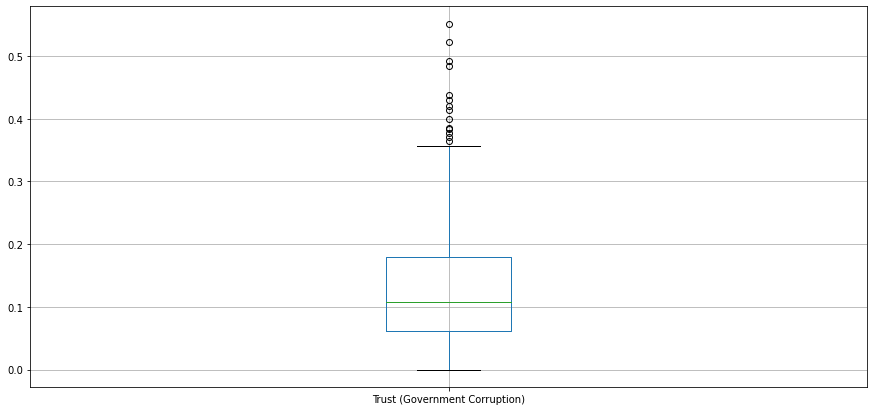

In [44]:
df.boxplot('Trust (Government Corruption)') # alot of outliers are present in this column

<AxesSubplot:>

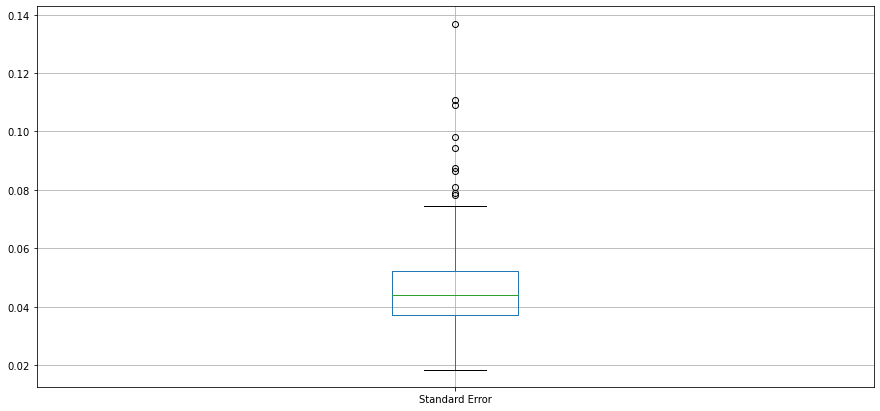

In [45]:
df.boxplot('Standard Error')

<AxesSubplot:>

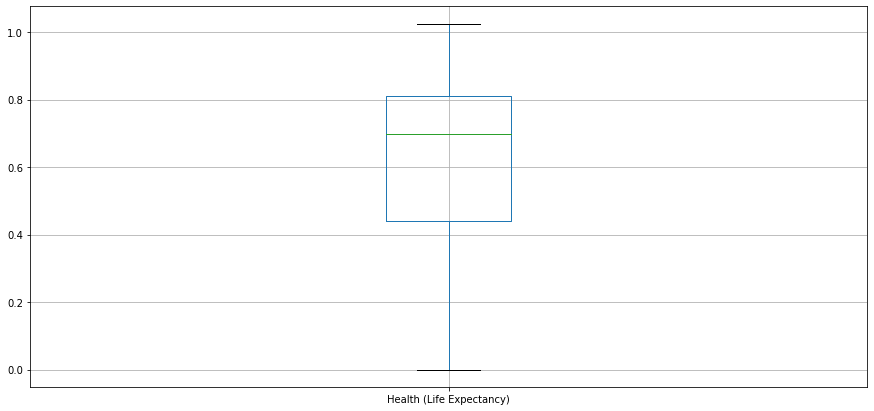

In [46]:
df.boxplot('Health (Life Expectancy)')

<AxesSubplot:>

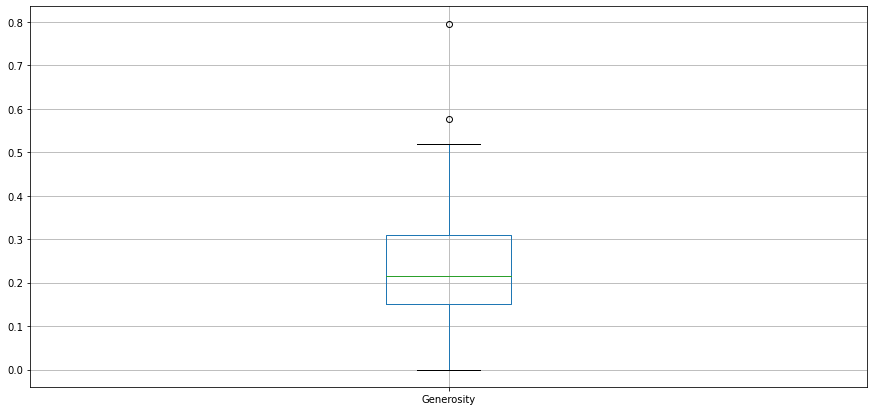

In [47]:
df.boxplot('Generosity')

### Cleaning the Data

In [48]:
df.corr()['Happiness Score'].sort_values() # keeping threshold to 1.8 we can remove the standard error

Standard Error                  -0.177254
Region                          -0.176791
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

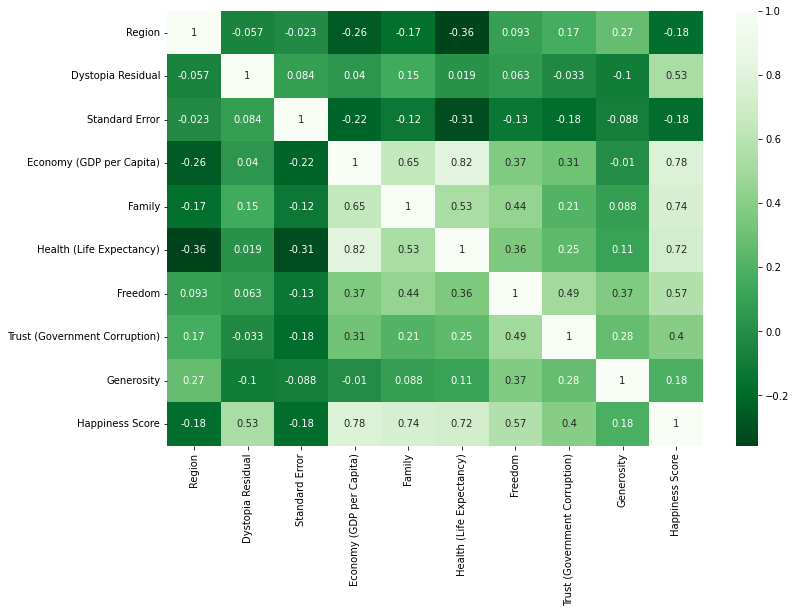

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens_r')

### Removing Outliers

In [50]:
df.dtypes

Country                           object
Region                             int32
Dystopia Residual                float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Happiness Score                  float64
dtype: object

In [51]:
# removing country
df.drop('Country',axis=1,inplace=True)

In [52]:
from scipy.stats import zscore

In [53]:
z = np.abs(zscore(df))
z

,Region,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,1.300256,0.758258,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,1.937360
1,1.300256,1.092857,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.914581
2,1.300256,0.712335,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,1.884792
3,1.300256,0.663893,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,1.880411
4,0.040302,0.639337,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,1.797179
...,...,...,...,...,...,...,...,...,...,...
153,0.965117,2.588925,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,1.674055
154,0.965117,0.843967,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,1.783571
155,0.375441,3.208430,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,2.076199
156,0.965117,0.481985,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,2.164688


In [54]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 2, 2, 2, 8, 4, 7, 1, 4], dtype=int64))

In [55]:
z.iloc[40][1] # alot of outliers present in standatrd error

0.3078011655676715

In [56]:
# before dropping checking how much data loss will be there
len(np.where(z>3)[0])  # there are only 9 outlier values so, we can go ahead and remove them

9

In [57]:
df_new = df[(z<3).all(axis=1)]

In [58]:
df_new.head()

,Region,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,9,2.51738,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,9,2.70201,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,9,2.49204,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,9,2.46531,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,5,2.45176,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


In [59]:
print('Old DataFrame', df.shape)
print('New DataFrame', df_new.shape)
print('total_rows_dropped',df.shape[0] - df_new.shape[0])

Old DataFrame (158, 10)
New DataFrame (149, 10)
total_rows_dropped 9


### Removing Skewness

In [60]:
df_new

,Region,Dystopia Residual,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,9,2.51738,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,9,2.70201,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,9,2.49204,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,9,2.46531,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,5,2.45176,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...,...,...
150,8,1.41723,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,3.655
151,8,1.46494,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,3.587
152,7,1.95210,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,3.575
154,8,1.63328,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,3.340


In [61]:
##seperating the data

x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

### Transforming and Scaling the Data With Standard Sclaer

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [63]:
st = StandardScaler()
x = st.fit_transform(x)
x

array([[ 1.29683671,  0.7568764 , -0.86678606, ...,  1.58370387,
         2.47225453,  0.54630526],
       [ 1.29683671,  1.10929978,  0.18566863, ...,  1.33895344,
         0.00924715,  1.71389767],
       [ 1.29683671,  0.70850719, -0.92608935, ...,  1.47602698,
         3.03674718,  0.91963022],
       ...,
       [ 0.63509469, -0.32213507, -1.10042671, ..., -1.28566246,
        -0.38241996,  1.11805063],
       [ 0.9659657 , -0.9307015 , -0.69173419, ...,  0.37943861,
        -0.53365337, -0.40922585],
       [ 0.9659657 , -0.54943602,  2.88218185, ..., -2.0547641 ,
        -0.35206708, -0.28645792]])

In [64]:
x.mean()

-4.7687431930208065e-17

In [65]:
x.std()

1.0

### Regulairization

In [96]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [98]:
rdg = Ridge(alpha=.0001,random_state=35)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)


0.9999999415925294

In [93]:
rdg.coef_

array([-4.81166179e-05,  5.23915579e-01, -1.36936353e-05,  3.86673886e-01,
        2.51044276e-01,  2.45079816e-01,  1.50298901e-01,  1.13020729e-01,
        1.19516555e-01])

In [94]:
predict = rdg.predict(x_test)

In [95]:
r2_score(y_test,predict)

0.9999999279148526

In [100]:
# TRying with lasso and elastic net as well

rdg = Ridge(alpha=.0001,random_state=35)
las = Lasso(alpha=.0001,random_state=35)
el = ElasticNet(alpha=.0001,random_state=35)

In [101]:
#lasso
las = Lasso(alpha=.0001,random_state=35)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.9999999163051283

In [102]:
#ElasticNet
el = ElasticNet(alpha=.0001,random_state=47)
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.999999930368574

In [ ]:
# Lasso is giving more accuracy

### Linear Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [67]:
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')

At random state 0 The model performs very well
At random state:- 0
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 1 The model performs very well
At random state:- 1
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 2 The model performs very well
At random state:- 2
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 3 The model performs very well
At random state:- 3
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 4 The model performs very well
At random state:- 4
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 5 The model performs very well
At random state:- 5
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 6 The model performs very well
At random state:- 6
Training r2 score is  100.0
Testing r2 score is  100.0 


At random state 7 The model performs very well
At random state:- 7
Training r2 score is  100.0
Testing r2 score is  100.0 




In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=20)

### Linear Regression

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
pred = lr.predict(x_test)

In [71]:
r2_score(y_test,pred) # we are getting the score of 99%

0.9999999228655397

In [72]:
mean_squared_error(y_test,pred)

9.104546525463842e-08

In [73]:
mean_absolute_error(y_test,pred) # We can see there are least errors

0.00026179446951116365

In [74]:
y_test.head()

49     5.948
76     5.286
77     5.268
133    4.218
70     5.477
Name: Happiness Score, dtype: float64

In [75]:
pred

array([5.9482134 , 5.28642637, 5.26792817, 4.21858846, 5.4769526 ,
       5.00711524, 3.66721779, 6.8528628 , 4.67743755, 7.19974105,
       3.90376254, 5.21199811, 4.43559098, 6.30239954, 6.57403256,
       4.36901997, 7.18724583, 5.77039996, 4.51790712, 5.79062251,
       5.87833573, 2.90453691, 4.60969873, 6.86722601, 5.33254635,
       5.12874461, 4.85757852, 6.32888841, 4.71483773, 4.07673907,
       4.87594596, 5.01306098, 7.58680465, 5.95965199, 7.22565401,
       4.68565735, 5.09767036, 7.56080339, 5.855204  , 4.19436132,
       5.82410926, 3.98871327, 6.29473885, 5.58870773, 5.81257917])

### Cross Validation 

In [76]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [77]:
for i in range(4,10):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')

[0.99999963 0.99999856 0.99999717 0.99999938]
At cv:-  4
Cross validation score is:-  99.99986860462428
r2_score is:-  99.99999228655398


[0.99999943 0.99999855 0.99999822 0.99999527 0.99999926]
At cv:-  5
Cross validation score is:-  99.99981481711602
r2_score is:-  99.99999228655398


[0.99999907 0.99999935 0.99999723 0.99999364 0.99999491 0.99999901]
At cv:-  6
Cross validation score is:-  99.9997203080739
r2_score is:-  99.99999228655398


[0.99999877 0.99999935 0.99998931 0.99999569 0.99999174 0.99999384
 0.99999883]
At cv:-  7
Cross validation score is:-  99.99953613624625
r2_score is:-  99.99999228655398


[0.99999838 0.9999989  0.99999536 0.99999702 0.9999891  0.99998879
 0.99999383 0.99999872]
At cv:-  8
Cross validation score is:-  99.99950132102155
r2_score is:-  99.99999228655398


[0.99999763 0.9999985  0.99999784 0.99999098 0.99999193 0.99998556
 0.99998476 0.99999632 0.99999869]
At cv:-  9
Cross validation score is:-  99.9993580301974
r2_score is:-  99.99999228655398




In [78]:
# Our Cross Validation Score and r2_score is almost the same,
# That means our model is working very well 99%

In [79]:
lrcscore_selected = cross_val_score(lr,x,y,cv=5).mean()
print('The CV Score is ',lrcscore_selected,'\nThe r2_score is: ',lrs)

The CV Score is  0.9999981481711602 
The r2_score is:  0.9999999228655397


In [80]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

## DTR

In [82]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print('dtr score:',dtr.score(x_train,y_train))

dtrpred = dtr.predict(x_test)
print('dtr r2_score:',r2_score(y_test,dtrpred))

print('Mean Absolute Error of dtr:',mean_absolute_error(y_test,dtrpred))
print('Mean Squared Error: of dtr',mean_squared_error(y_test,dtrpred))
print('Root Mean Squared Error of dtr:',np.sqrt(mean_squared_error(y_test,dtrpred)))

dtr score: 1.0
dtr r2_score: 0.7664179534559974
Mean Absolute Error of dtr: 0.39480000000000004
Mean Squared Error: of dtr 0.2551366222222222
Root Mean Squared Error of dtr: 0.5051105049612631


In [85]:
pred_dtr = dtr.predict(x_test)
from sklearn.model_selection import cross_val_score
dts = r2_score(y_test,pred_dtr)

In [83]:
# The accuracy is 76% in DecisionTreeRegressor

In [84]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
print('knr score:',knr.score(x_train,y_train))

knrpred = knr.predict(x_test)
print('knr r2_score:',r2_score(y_test,knrpred))

print('Mean Absolute Error of knr:',mean_absolute_error(y_test,knrpred))
print('Mean Squared Error of knr:',mean_squared_error(y_test,knrpred))
print('Root Mean Squared Error of knr:',np.sqrt(mean_squared_error(y_test,knrpred)))

knr score: 0.933904525861249
knr r2_score: 0.8757517415141465
Mean Absolute Error of knr: 0.30223555555555554
Mean Squared Error of knr: 0.13571368799999992
Root Mean Squared Error of knr: 0.36839338756280615


In [ ]:
# Knn is giving 87% score

### SVR

In [103]:
kernellist = ['linear','poly','rbf']
for i in kernellist:
    sv = SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))
    

0.9974219293764486
0.9607219244436515
0.9842965467225188


In [104]:
# linear is giving mote accuracy

In [108]:
sv = SVR(kernel ='linear')
sv.fit(x_train,y_train)
pred_sv = sv.predict(x_test)

print('r2_score of svr is',r2_score(y_test,pred_sv))
print('Mean Absolute Error of svr:',mean_absolute_error(y_test,pred_sv))
print('Mean Squared Error of svr:',mean_squared_error(y_test,pred_sv))
print('Root Mean Squared Error of svr:',np.sqrt(mean_squared_error(y_test,pred_sv)))     

r2_score of svr is 0.996419721944314
Mean Absolute Error of svr: 0.0521026034237876
Mean Squared Error of svr: 0.003910660357931164
Root Mean Squared Error of svr: 0.06253527291002385


## SGD Regressor

In [109]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(x_train,y_train)
print('sgd score:',sgd.score(x_train,y_train))

sgdpred = sgd.predict(x_test)
print('sgd r2_score:',r2_score(y_test,sgdpred))

print('Mean Absolute Error of sgd:',mean_absolute_error(y_test,sgdpred))
print('Mean Squared Error of sgd:',mean_squared_error(y_test,sgdpred))
print('Root Mean Squared Error of sgd:',np.sqrt(mean_squared_error(y_test,sgdpred)))

sgd score: 0.9963193036155679
sgd r2_score: 0.9918127560606746
Mean Absolute Error of sgd: 0.07233715486156342
Mean Squared Error of sgd: 0.008942749645766659
Root Mean Squared Error of sgd: 0.09456611256558375


### RANDOMFOREST REGRESSSOR

In [110]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42) # n_estimators=100--> by default

rf.fit(x_train,y_train)
print('rf score:',rf.score(x_train,y_train))

rfpred = rf.predict(x_test)
print('rf r2_score:',r2_score(y_test,rfpred))

print('Mean Absolute Error of rf:',mean_absolute_error(y_test,rfpred))
print('Mean Squared Error of rf:',mean_squared_error(y_test,rfpred))
print('Root Mean Squared Error of rf:',np.sqrt(mean_squared_error(y_test,rfpred)))

rf score: 0.9861694045602989
rf r2_score: 0.8363555149699581
Mean Absolute Error of rf: 0.31982911111111145
Mean Squared Error of rf: 0.1787453349844447
Root Mean Squared Error of rf: 0.42278284613314754


## AdaBoostRegressor

In [111]:
# ADABOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 50,random_state=42)

ada.fit(x_train,y_train)
print('ada score:',ada.score(x_train,y_train))

adapred = ada.predict(x_test)
print('ada r2_score:',r2_score(y_test,adapred))

print('Mean Absolute Error of ada:',mean_absolute_error(y_test,adapred))
print('Mean Squared Error of ada:',mean_squared_error(y_test,adapred))
print('Root Mean Squared Error of ada:',np.sqrt(mean_squared_error(y_test,adapred)))

ada score: 0.9682548565070342
ada r2_score: 0.8458622500577866
Mean Absolute Error of ada: 0.34291319482018684
Mean Squared Error of ada: 0.16836133366860237
Root Mean Squared Error of ada: 0.410318575826884


### GradientBoostingRegressor

In [112]:

from sklearn.ensemble import GradientBoostingRegressor

grid = GradientBoostingRegressor()

grid.fit(x_train,y_train)
print('grid score:',grid.score(x_train,y_train))

gridpred = grid.predict(x_test)
print('rf r2_score:',r2_score(y_test,gridpred))

print('Mean Absolute Error of grid:',mean_absolute_error(y_test,gridpred))
print('Mean Squared Error of grid:',mean_squared_error(y_test,gridpred))
print('Root Mean Squared Error of grid:',np.sqrt(mean_squared_error(y_test,gridpred)))

grid score: 0.9996193221878762
rf r2_score: 0.9204944346254232
Mean Absolute Error of grid: 0.22265298703463246
Mean Squared Error of grid: 0.08684221111024597
Root Mean Squared Error of grid: 0.2946900254678566


### Saving the best model

In [117]:
import pickle
filename = 'world_happiness.pkl'
pickle.dump(lr,open(filename, 'wb'))

In [118]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com


,Original,Predicted
0,3.819,3.819180
1,7.286,7.286088
2,5.268,5.267928
3,4.419,4.419288
4,7.427,7.426894
5,5.007,5.007115
6,5.192,5.192297
7,4.677,4.677438
8,6.786,6.786205
9,5.399,5.398789
